# WEEK 4

In [3]:
# Loading Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\lovely\Downloads\Indian_Kids_Screen_Time_final.csv")
sns.set_style('whitegrid')
df.head(9)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Device_Share,Edu_Recreational_Percent
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teen,0.470346,42.0
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen,0.147549,30.0
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teen,0.256075,32.0
3,15,Female,1.21,Laptop,False,0.39,Unknown,Urban,Teen,0.147549,39.0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen,0.470346,49.0
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Teen,0.470346,44.0
6,17,Male,2.97,TV,False,0.48,Unknown,Rural,Teen,0.256075,48.0
7,10,Male,2.74,TV,True,0.54,Unknown,Urban,Pre-Teen,0.256075,54.0
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Teen,0.147549,36.0


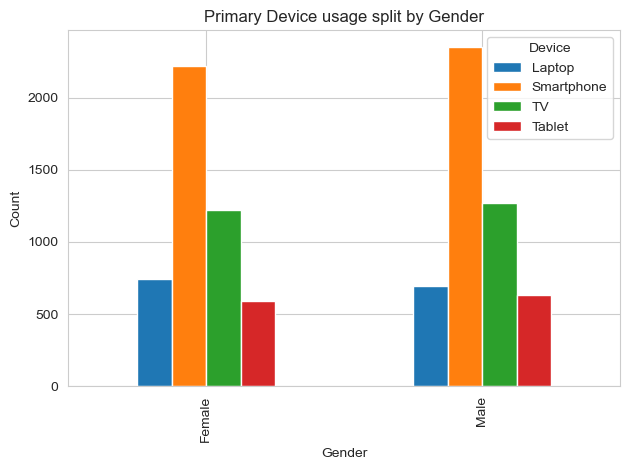

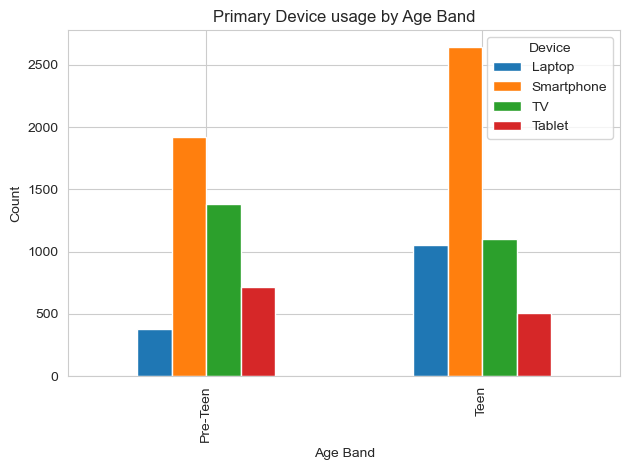

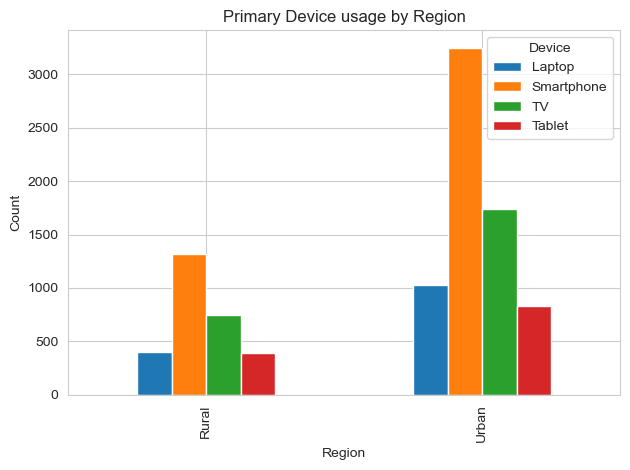

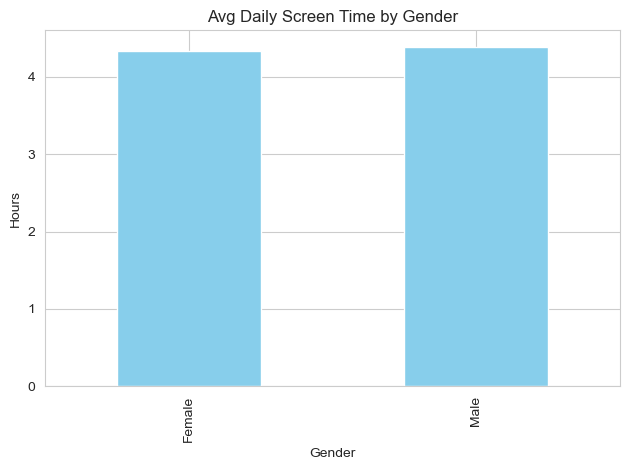

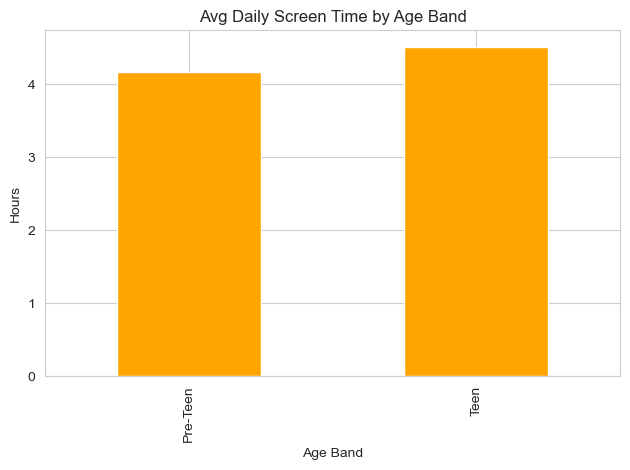

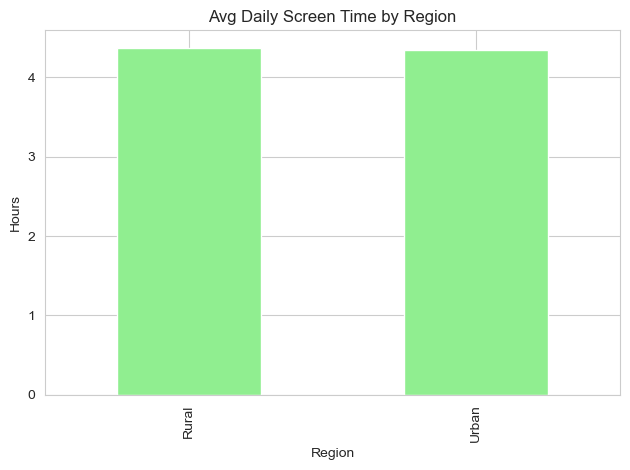

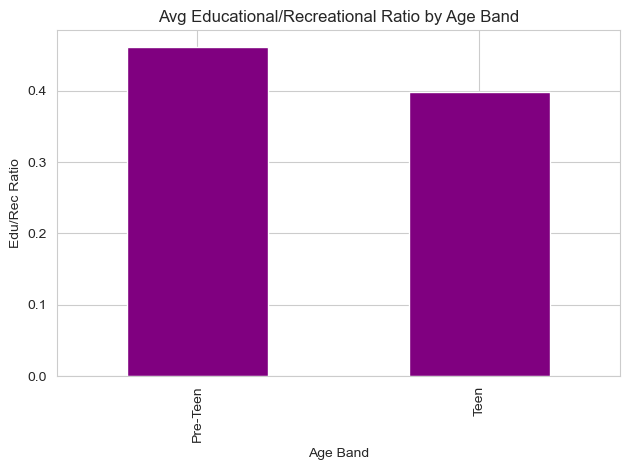

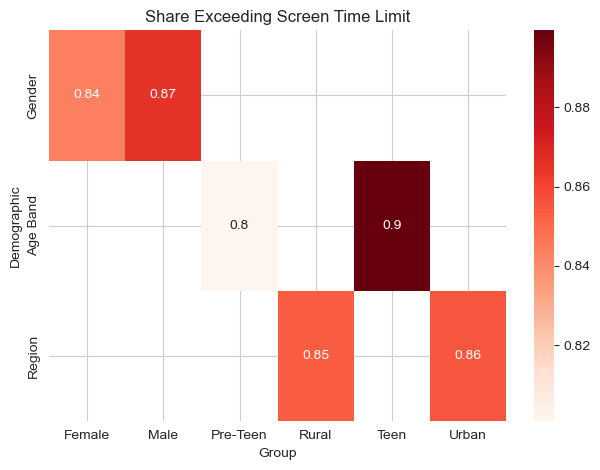

In [7]:
# ---- 1. Bar chart: Primary Device vs Gender ----
device_gender = df.groupby(['Gender', 'Primary_Device']).size().unstack().fillna(0)
device_gender.plot(kind='bar', stacked=False)
plt.title('Primary Device usage split by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Device')
plt.tight_layout()
plt.show()

# ---- 2. Bar chart: Primary Device vs Age Band ----
device_ageband = df.groupby(['Age_Band', 'Primary_Device']).size().unstack().fillna(0)
device_ageband.plot(kind='bar')
plt.title('Primary Device usage by Age Band')
plt.ylabel('Count')
plt.xlabel('Age Band')
plt.legend(title='Device')
plt.tight_layout()
plt.show()

# ---- 3. Bar chart: Primary Device vs Region ----
device_region = df.groupby(['Urban_or_Rural', 'Primary_Device']).size().unstack().fillna(0)
device_region.plot(kind='bar')
plt.title('Primary Device usage by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Device')
plt.tight_layout()
plt.show()

# ---- 4. Column chart: Avg Daily Screen Time by Gender ----
df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean().plot(kind='bar', color='skyblue')
plt.title('Avg Daily Screen Time by Gender')
plt.ylabel('Hours')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

# ---- 5. Column chart: Avg Daily Screen Time by Age Band ----
df.groupby('Age_Band')['Avg_Daily_Screen_Time_hr'].mean().plot(kind='bar', color='orange')
plt.title('Avg Daily Screen Time by Age Band')
plt.ylabel('Hours')
plt.xlabel('Age Band')
plt.tight_layout()
plt.show()

# ---- 6. Column chart: Avg Daily Screen Time by Region ----
df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean().plot(kind='bar', color='lightgreen')
plt.title('Avg Daily Screen Time by Region')
plt.ylabel('Hours')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

# ---- 7. Bar chart: Educational vs Recreational Ratio by Age Band ----
df.groupby('Age_Band')['Educational_to_Recreational_Ratio'].mean().plot(kind='bar', color='purple')
plt.title('Avg Educational/Recreational Ratio by Age Band')
plt.ylabel('Edu/Rec Ratio')
plt.xlabel('Age Band')
plt.tight_layout()
plt.show()

# ---- 8. Heatmap: Share Exceeding Screen Time Limit by Demographics ----
import seaborn as sns
heatmap_data = pd.DataFrame({
    'Gender': df.groupby('Gender')['Exceeded_Recommended_Limit'].mean(),
    'Age Band': df.groupby('Age_Band')['Exceeded_Recommended_Limit'].mean(),
    'Region': df.groupby('Urban_or_Rural')['Exceeded_Recommended_Limit'].mean()
})
sns.heatmap(heatmap_data.T, annot=True, cmap='Reds')
plt.title('Share Exceeding Screen Time Limit')
plt.ylabel('Demographic')
plt.xlabel('Group')
plt.tight_layout()
plt.show()


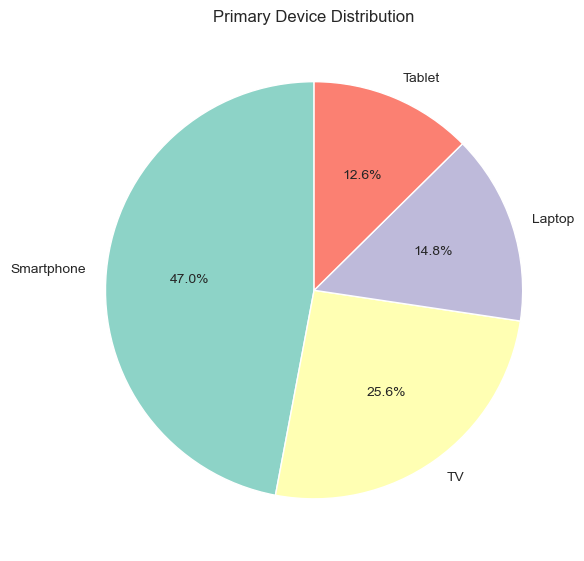

In [9]:
# Count device types
device_counts = df['Primary_Device'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Primary Device Distribution')
plt.tight_layout()
plt.show()


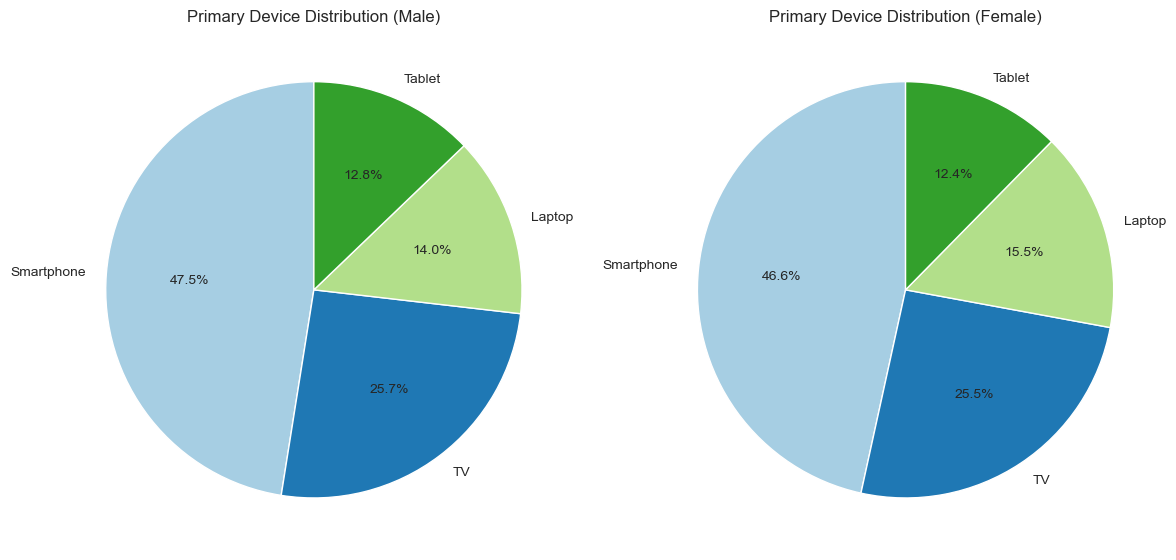

In [10]:
# Prepare data for 1st pie chart: device distribution for Males
device_male = df[df['Gender'] == 'Male']['Primary_Device'].value_counts()

# Prepare data for 2nd pie chart: device distribution for Females
device_female = df[df['Gender'] == 'Female']['Primary_Device'].value_counts()

# Prepare subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart 1: Male Device Distribution
axes[0].pie(device_male, labels=device_male.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('Primary Device Distribution (Male)')

# Pie chart 2: Female Device Distribution
axes[1].pie(device_female, labels=device_female.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title('Primary Device Distribution (Female)')

plt.tight_layout()
plt.show()


# Observation 
## Device Usage Patterns:

* Smartphones dominate as the primary device for children across all demographics.

* Tablets show the least usage among devices.

* Teens favor Smartphones and Laptops more, while Pre-Teens use more TV and Tablets.

* Urban children use all devices more frequently than rural children, especially Smartphones.

## Screen Time Differences:

* Average daily screen time is higher for Teens than Pre-Teens.

* Males spend slightly more time on screens than Females.

* Rural and Urban children show almost equal average screen time.

## Educational vs Recreational Screen Time:

* Pre-Teens have a higher ratio of educational to recreational screen time compared to Teens, suggesting more balanced screen activities.

## Screen Time Limit Exceedance:

* A significant proportion of children exceed the recommended screen time limits.

* The likelihood of exceeding limits is highest among Teens and slightly higher in Males.

* This pattern is consistent across urban and rural areas.

## Pie Chart Comparisons:

* Device preferences between males and females are similar, but males lean more toward Smartphones and TVs.

* Age band comparisons show a clear age-driven preference shift where device usage changes from Tablets and TVs in Pre-Teens to Smartphones and Laptops in Teens.

## Heatmap Insights:

* Screen time by Age Band and Gender shows the highest averages for male Teens.

## Scatter and Box Plots:

* Variations in screen time with age show some overlap but with outliers reaching high screen time.

* Box plot distributions reflect that males and Teens have a broader range of higher screen usage.